<a href="https://colab.research.google.com/github/trilgar/IAD2023/blob/main/Zaritskyi_CP8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size="6"><b>Комп'ютерний практикум 8.

<center><b> Методи класифікації </font>


<center><b><i><font size="4"> LR (Logistic Regression)

SVM(Support Vector Machine)</b></center>


##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP8.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* побудуйте парні діаграми класів для всих ознак датасету
* сформуйте масив характеристик $X$ та цільової змінної/класу $Y$ 
* виведіть кількість елементів у кожному класі
* поділіть вибірку на навчальну та тестову у співвідношенні 30/70
 


       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


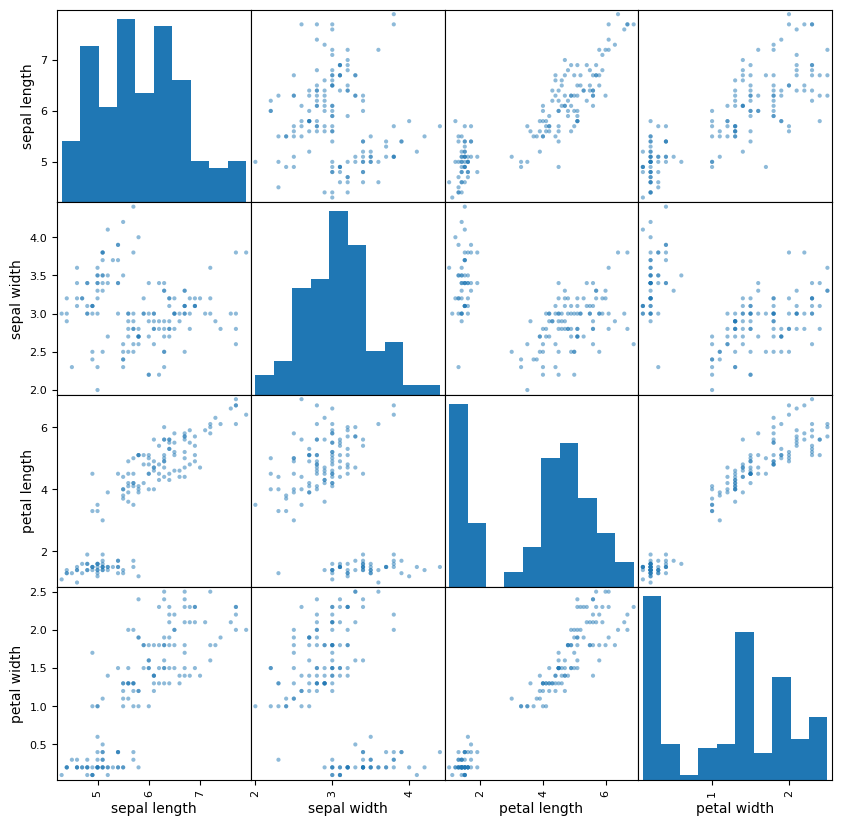

class label
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Завантаження даних
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class label'])

# Описова статистика
print(data.describe())

# Парні діаграми класів
pd.plotting.scatter_matrix(data, figsize=(10,10))
plt.show()

# Формування масиву характеристик X та цільової змінної/класу Y
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Виведення кількості елементів у кожному класі
print(data.groupby('class label').size())

# Розділення вибірки на навчальну та тестову у співвідношенні 30/70
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)



### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм LR, використовуючи `solver='liblinear'`,`solver='newton-cg'` та `solver='lbfgs'`
* порівняйте результати роботи різних оптимізаторів оціночними критиеріями 
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Застосування алгоритму LR з різними оптимізаторами
solvers = ['liblinear', 'newton-cg', 'lbfgs']
for solver in solvers:
    lr = LogisticRegression(solver=solver, multi_class='ovr')
    lr.fit(X_train_std, Y_train)
    Y_pred = lr.predict(X_test_std)
    acc = accuracy_score(Y_test, Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    print(f"Solver: {solver}, Accuracy: {acc}")
    print(f"Confusion Matrix:\n{cm}\n")

Solver: liblinear, Accuracy: 0.8222222222222222
Confusion Matrix:
[[14  0  0]
 [ 0 11  7]
 [ 0  1 12]]

Solver: newton-cg, Accuracy: 0.8666666666666667
Confusion Matrix:
[[14  0  0]
 [ 0 13  5]
 [ 0  1 12]]

Solver: lbfgs, Accuracy: 0.8666666666666667
Confusion Matrix:
[[14  0  0]
 [ 0 13  5]
 [ 0  1 12]]



Висновок:

Як бачимо, 'newton-cg', 'lbfgs' показали себе однаково гарно, libliear показав себе трохи гірше. Вцілому точність моделей задовільна але очевидно набагато гірша за складні нейронні мережі.

### Завдання №3

* Застосуйте алгоритм SVM з ядром `rbf`, `linear` та `sigmoid` 
* порівняйте результати роботи різних перетворень функцій ядер оціночними критеріями 
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки

In [5]:
from sklearn import svm
from sklearn.metrics import classification_report

# Створення об'єкту класифікатора SVM з ядром rbf
svm_rbf = svm.SVC(kernel='rbf')

# Навчання класифікатора SVM з ядром rbf
svm_rbf.fit(X_train_std, Y_train)

# Визначення якості класифікації на тестовій вибірці для класифікатора SVM з ядром rbf
Y_pred_rbf = svm_rbf.predict(X_test_std)
print(classification_report(Y_test, Y_pred_rbf))

# Створення об'єкту класифікатора SVM з ядром linear
svm_linear = svm.SVC(kernel='linear')

# Навчання класифікатора SVM з ядром linear
svm_linear.fit(X_train_std, Y_train)

# Визначення якості класифікації на тестовій вибірці для класифікатора SVM з ядром linear
Y_pred_linear = svm_linear.predict(X_test_std)
print(classification_report(Y_test, Y_pred_linear))

# Створення об'єкту класифікатора SVM з ядром sigmoid
svm_sigmoid = svm.SVC(kernel='sigmoid')

# Навчання класифікатора SVM з ядром sigmoid
svm_sigmoid.fit(X_train_std, Y_train)

# Визначення якості класифікації на тестовій вибірці для класифікатора SVM з ядром sigmoid
Y_pred_sigmoid = svm_sigmoid.predict(X_test_std)
print(classification_report(Y_test, Y_pred_sigmoid))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.83      0.91        18
 Iris-virginica       0.

Висновок:

Як бачимо найкраще себе покзав SVM з лінійним ядром. Точність набагато краща за LR. Видно, що найгіргше модель справляється з класифікацією ірису виду Iris-virginica, в той час як безпомилково визначає клас Iris-setosa

### Завдання №4

* Порівняйте результати класифікації методами, отриманими в попередньому КП№7, kNN, дерева рішень та LR, SVM для заданого набору даних
* оберіть найкращий метод класифікації, обгрунтуйте ваше рішення



В порівнянні з минулими методами, метод SVM показав себе значно краще, але метод LR показав себе найгірше із всіх 4 методів. Можливо це пов'язано із тим що взаємозв'язки між переметрами ірису та його класом досить складні і сусідні екземпляри можуть належати до різних класів. Загалом найкраще з усіх показав себе SVM з лінійним ядром.